In [43]:
# Basics of Neural networks 

For getting the best parameters for the linear regression and then find the best parameters by using the gradient descent.

In [148]:
import numpy as np 
import matplotlib.pyplot as plt 
np.random.seed(0)
import random

In [149]:
data_points = np.linspace(-5,5,21)
data0 = np.array([data_points,15 +2.4*data_points -0.5*data_points**2 -0.35*data_points**3])# creating random data 
data = np.array([data0[0]+0.25 * (2*np.random.rand(21)-1),data0[1] +5.0 * (2*np.random.rand(21)-1)]) 

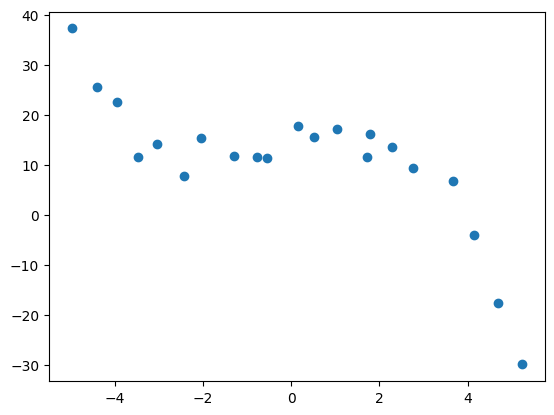

In [150]:
plt.scatter(data[0],data[1])
# this is the data that we want to fit 

In [151]:
# we consider a polynomial a0+a1x+a2x^2+a3x^3

In [152]:
def pmodel(x,a):
    return a[0] + a[1]*x + a[2]*x**2 + a[3]*x**3

In [153]:
a = 2*np.random.rand(4)-1
# 4 values in the range from -1 to 1 random values 

In [154]:
a # this is basically the randomy generataed parameters and we are using these parameters to get the optimal parameters later on

array([ 0.39526239, -0.87954906,  0.33353343,  0.34127574])

In [155]:
# A contains 4 random values as of now, because we need to adjsut these values based of the erros

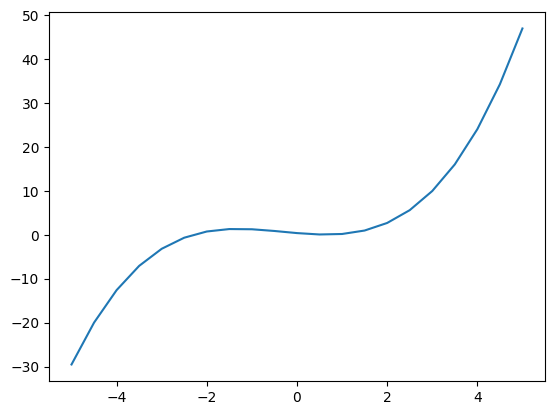

In [156]:
plt.plot(data_points,pmodel(data_points,a)) 
# randomy generated function 

In [157]:
# updating the coefficients and reducing the errors based of gradient descent 
# the below image just show us the calculated derivative.

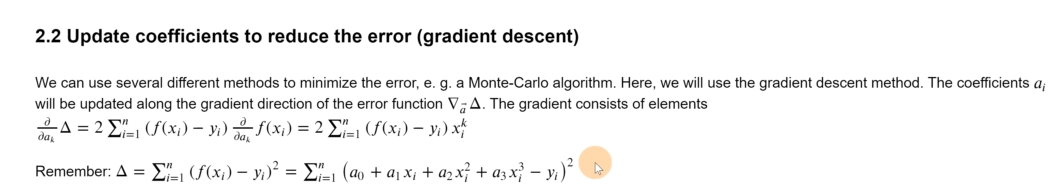

In [158]:
# We are just programming the above equation here 
def errorgradient(f,coef, data):
      return 2* np.array([np.sum((f(data[0,:],coef)- data[1,:]) * data[0,:]**k) for k in range(4)])  

In [159]:
errorgradient(pmodel,a,data)

array([ -274.96086574,  3260.19590312,  1033.60781245, 71705.53934111])

In [160]:
# now we just have to loop over the algo for gradient descent 

In [179]:
iterations = 2000
# learning rate 
h=0.00001
for i in range(iterations):
    a = a - h * errorgradient(pmodel,a,data)   

In [180]:
a 

array([ 8.30171131,  2.57139273,  0.04477802, -0.34925631])

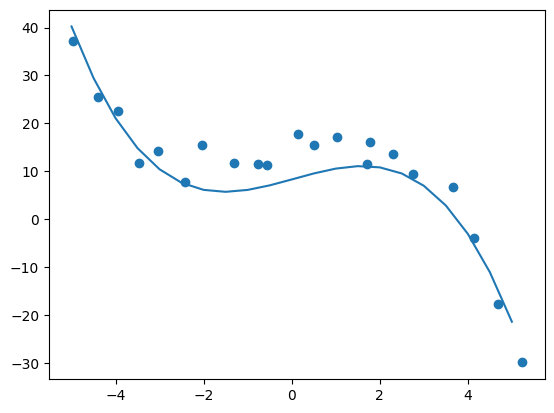

In [181]:
plt.scatter(data[0],data[1])
plt.plot(data_points,pmodel(data_points,a)) 
# we are having problems with calculation of values of a 

In [ ]:
# Here we can see that we have optimized the weights for the given polynomial function.

In [182]:
# General idea behind neural netweorks where interpolation is very importnat 
# even if we have multiple variables we still have to follow the same process everytime 

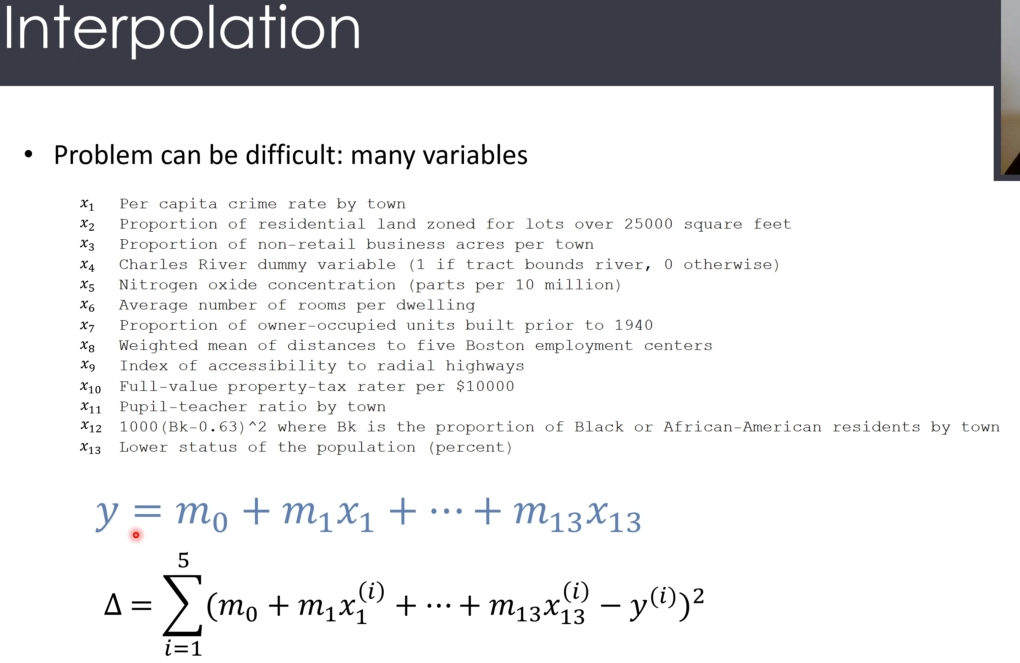

In [183]:
# The problem also arises when we have non-linear problems

In [184]:
# Neural networks 
# the problem here is to find the optimal weights that we can use to calculate the outputs 
# General IDea
# given the inputs and weights we can calculate the value of next neuron and finally we get the output signals
# h1= v01+ v11*x1 ....+ v14*x4 [dot products basically]. here v represents the weights of the neurons
# y1 = w01 + w11h1 ... +w14 h5[exactly same process but with different weights]
# We try to find the ideal weights , by minimizing errors as shown above
# sum(predicted- true)^2 = error
# sum(yi[predicted] - ti[given by us])^2

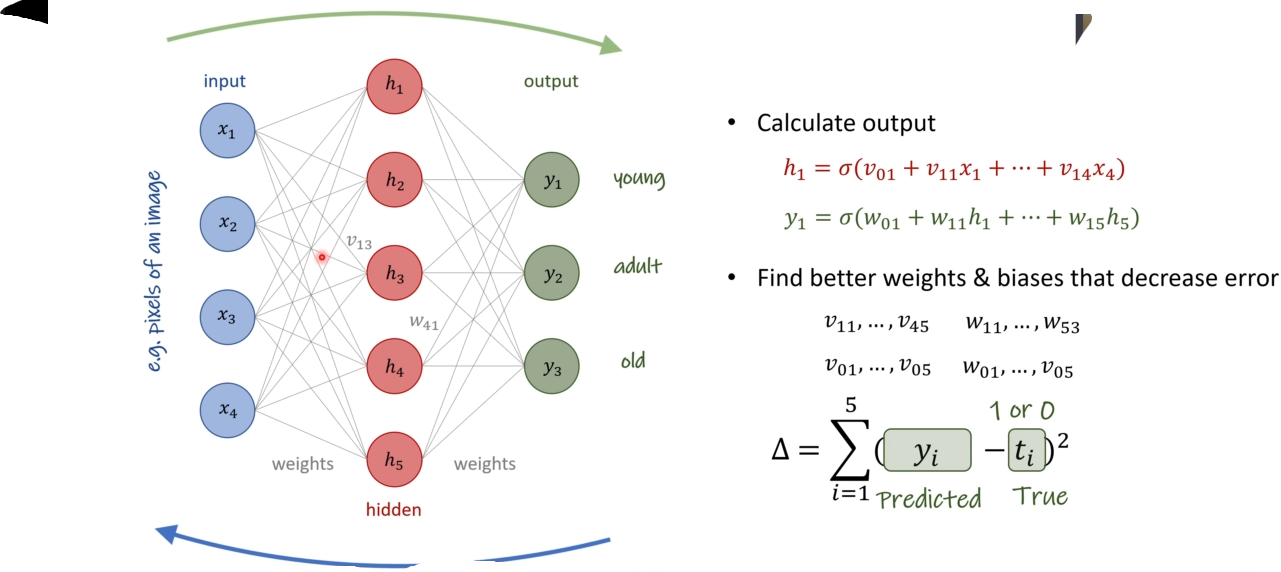

In [185]:
# Addition of two numbers 
# input will be 2 numbers amd after training the network e shall have the sum of the numbers and we need bias as an input as it will 
# help us solving difficult problemns
# The end goal is to get the sums of two numbers and we know how to calculate the sum therefore we know what must be the weights 
# as y0= x0*w0+x1*w1+x2*w2 and using this we know w0=0, w1=1 and w2= 1 
# this doesn't have a hidden layer within 

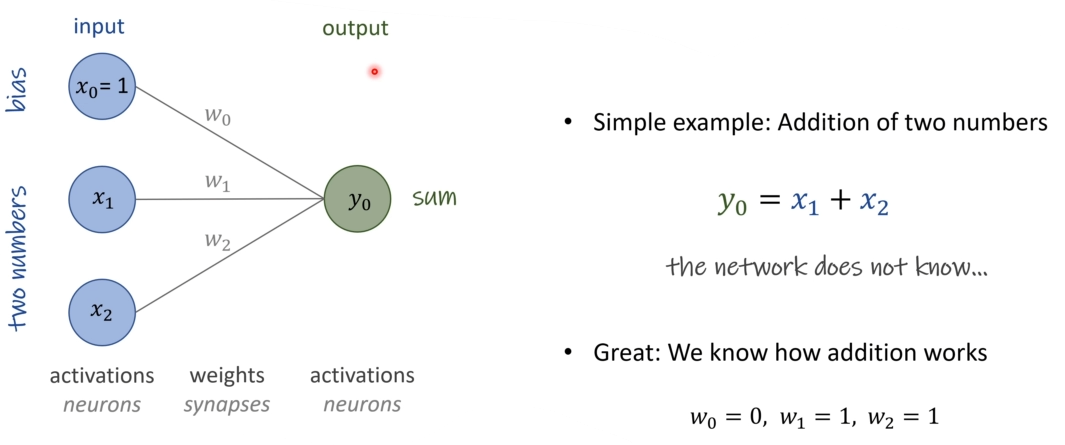

In [186]:
# generating the training and testing data 
datain = np.random.randint(-20,21,size=(1000,2)) # Input data 
# given thr range of -20 to 21 

In [187]:
datain[:,0]# getting the first column 
datain[:,1]# geting the second column
dataout=datain[:,0]+datain[:,1] # the sum of bot of the columns of the data 

In [188]:
# Adding biasness in the input data, it will not do anything and the network should assign it a weight of 0
datain = np.concatenate([np.ones([1000,1]),datain],axis=1)

In [189]:
datain

array([[  1.,  -2.,   7.],
       [  1., -20.,  -6.],
       [  1.,  15.,  -8.],
       ...,
       [  1.,  15.,  18.],
       [  1.,  -9.,  19.],
       [  1.,  -9.,  16.]])

In [190]:
# defing testing and training data 
x_train = datain[:700]
x_test = datain[700:]
y_train = dataout[:700]
y_test = dataout[700:]

In [191]:
# Setting up the neural network 

In [192]:
# INput layer have 3 numbers and output layer has only 1 number 
# we need to provide some weights and for that we need a starting point for them and we select them randomly 

In [193]:
weights = 4 *np.random.random_sample(3) -2 # This gives us only 3 random values in between 0 and 1 and that why we multiply it
# by 4 and then subtract 2 so that we get the number between -2 and 2

In [194]:
weights

array([-1.0580701 ,  1.21516674, -1.8836766 ])

In [195]:
# Activation function [ It is a monotonous function that rescales the values between 0 and 1 ] 
# In the addition program it does not seem to be necessary we may use it in future

In [196]:
# calculate the output of the neural network
# we have to remember that the value of the neural network is given by the dot producty as discussed previously.
# y = w0 + w1x1 + w2x2 

In [197]:
def calculateout(x,w):
    # x is the input and w is the weights and we return the dot product 
    return np.dot(x,w) 

In [198]:
np.sign(np.round(calculateout(x_train[10],weights)))

1.0

In [199]:
x_train[10]

array([ 1., -5., -7.])

In [200]:
# we have to train the weights so that our neural netweork can learn the pattern.
# and as we are calculating for sum of the numbers we know that the y = w0(0) + w1(1)x1 +w2(1)x2 , that w0 = and w1 and w2 should be 1

In [201]:
# calculate the accuracy and individual error

In [202]:
def accuracy(x_test, y_test,weights):
    return 1 - np.sum(np.abs(np.sign(np.round(calculateout(x_test,weights))-y_test)))/len(y_test)
# we are subtracting the y_train because we need to calculate the error.
# np.round will round the asnwer to the nearest number  
# using the np.sign will give us the output in -1,1 and 0 based on the sign of the outputs 
# np.abs convert the -1 to the +1 and 0 to 0 and +1 keep it same
# np.sum will tell us all about the totla number of data that was not calculated correctly and we divide it by the length of the 
# total inputs in order for us to get the error percentage in the program and then we subtract it by 1 so that we have the 
# accuracy of the function 
# we can simply understand this as [mean(x_test) == mean(y_test)]  

In [203]:
accuracy(x_train,y_train,weights)
# Initially without training the network we observe the value to be very less

0.005714285714285672

In [204]:
# calculating error for learning 
# err= (predictions - actual)^2 

In [205]:
def error(predictedvalues, correctvalues):
    return np.sum(predictedvalues - correctvalues)**2
# this will be used when we evaluate the models

In [206]:
error(calculateout(x_train,weights),y_train)

796934.6813288704

In [207]:
# calculate gradient
# we want to reduce the error 
# taking the derivative[by weights] of the sum of predicted 0 correct values square give us the below sattemet 

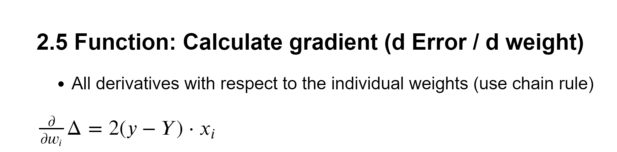

In [208]:
def gradientslow(x,w,correctvalues):
    return np.array([2* (calculateout(x,w)-correctvalues) * x[indexweight] for indexweight in range(3)]) 
# It is just the same thing happenning as down below

In [211]:
def gradient(x,w,correctvalues):
    return 2* (calculateout(x,w) - correctvalues) *x 
# this will return the same output as before 

In [212]:
# using gradient descent to change the weights to minimize the error 

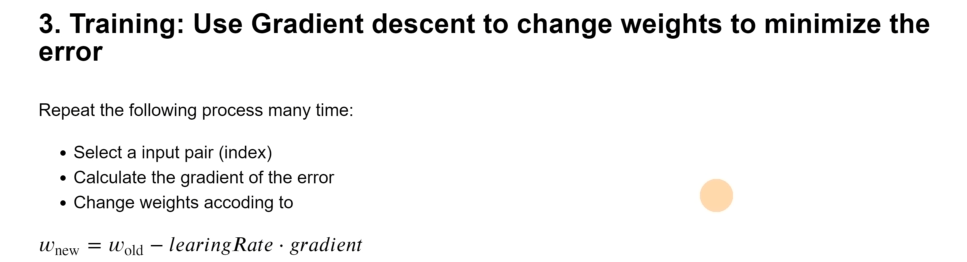

In [213]:
lr = 0.001 # learning rate 
steps = 10000
# for docs 
errorlist= [error(calculateout(x_train[10],weights),y_train[10])]
weightlist = [weights]

In [214]:
for i in range(steps):
    # pick random input 
    index = np.random.randint(1000 - 300)# full lengt of the data - the trainingsize of the data to get the length of the testing data.
    # we are going to  get new index everytime we run through the loop.
    # update the weights (go alnong the opposite gradient )
    weights = weights - lr * gradient(x_train[index],weights,y_train[index])
    weightlist.append(weights)
    # calculate new errors
    errorlist.append(error(calculateout(x_train[index],weights),y_train[index]))  

In [215]:
errorlist[-1]
# starting from pretty large error we are able to reduce the errors 

5.278159208614242e-18

In [216]:
weights
# here we get the weights 
# w0 comes to be basically 0 and w1 and w2 comes to be bascially 1 each as we can see 


array([-2.10242102e-09,  1.00000000e+00,  1.00000000e+00])

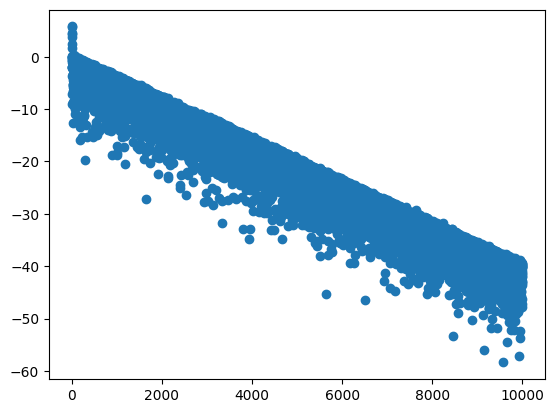

In [217]:
plt.scatter(range(steps +1 ),np.log(errorlist))
# it tells us that the error has reduced dramatically

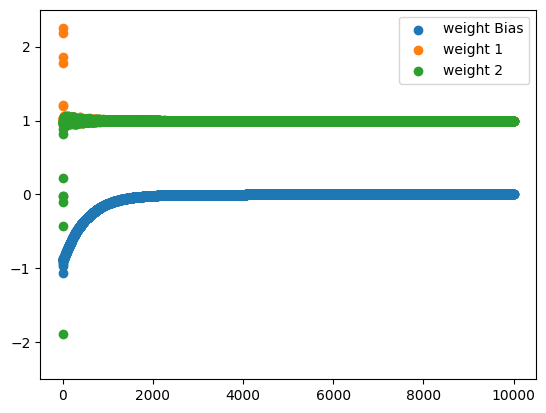

In [218]:
plt.ylim([-2.5,2.5])
plt.scatter(range(steps +1 ),np.array(weightlist)[:,0],label = "weight Bias")
plt.scatter(range(steps +1 ),np.array(weightlist)[:,1],label = "weight 1")
plt.scatter(range(steps +1 ),np.array(weightlist)[:,2],label = "weight 2")
plt.legend()
plt.show()
# here we can clearly observe that the weights merge to their expected values and we can say that the model has learn 
# how to calculate the sum.

In [219]:
# APPlication to test the data set 

In [220]:
np.round(calculateout(x_test,weights))

array([ 27., -18.,  -6.,   4.,  31.,   1.,  23.,   2., -18., -14., -29.,
        -1.,  -1., -15., -20., -19.,  14., -29.,  -2.,  26.,   2.,  21.,
         6.,   3.,  -7.,  12.,   7., -21., -16., -25.,   4., -10.,   7.,
        10.,   8., -20.,  21.,  17., -31.,   5.,  -6.,  18., -13., -12.,
        36.,   9.,   1.,  11.,   3.,  26.,  31.,  10.,   6., -38.,  21.,
       -20.,  -4., -18., -23.,   2.,   3.,  12.,  -5.,   6.,   9., -21.,
        -1.,   5.,  20., -18.,  36., -11.,   1., -19.,  23., -18.,   9.,
       -27., -10., -24.,  11., -33.,  -4., -17.,  -5.,   9., -30.,  -7.,
        31.,   5.,  -5.,   8., -11.,  -0.,   1.,   4., -10.,  10.,  22.,
       -19.,  -7.,   1., -26.,  20.,  12., -23.,  -1.,  13.,  28.,  -0.,
        -4., -28.,  -3., -18., -17.,   5., -12., -17.,  -1., -10.,   7.,
        -3.,  -6.,   6.,  21.,   4.,   7., -20.,  -4.,   6.,  30.,  13.,
         8.,  28.,  23.,  -9.,  11.,  -9.,  -3., -15.,  -8.,  20., -21.,
        -8.,   8., -20.,   7.,   2., -10.,  33.,  2

In [221]:
y_test

array([ 27, -18,  -6,   4,  31,   1,  23,   2, -18, -14, -29,  -1,  -1,
       -15, -20, -19,  14, -29,  -2,  26,   2,  21,   6,   3,  -7,  12,
         7, -21, -16, -25,   4, -10,   7,  10,   8, -20,  21,  17, -31,
         5,  -6,  18, -13, -12,  36,   9,   1,  11,   3,  26,  31,  10,
         6, -38,  21, -20,  -4, -18, -23,   2,   3,  12,  -5,   6,   9,
       -21,  -1,   5,  20, -18,  36, -11,   1, -19,  23, -18,   9, -27,
       -10, -24,  11, -33,  -4, -17,  -5,   9, -30,  -7,  31,   5,  -5,
         8, -11,   0,   1,   4, -10,  10,  22, -19,  -7,   1, -26,  20,
        12, -23,  -1,  13,  28,   0,  -4, -28,  -3, -18, -17,   5, -12,
       -17,  -1, -10,   7,  -3,  -6,   6,  21,   4,   7, -20,  -4,   6,
        30,  13,   8,  28,  23,  -9,  11,  -9,  -3, -15,  -8,  20, -21,
        -8,   8, -20,   7,   2, -10,  33,  25,   3,  17,  -7,   3,   4,
        23,  -1,  -6,  -2,   0,  -1,   1,  -3, -12,   4, -12,  -1,  30,
        -8,  17,  10,  39,  26, -30, -13, -10,  17,  -1,  12, -1

In [222]:
accuracy(x_test,y_test,weights)
# getting the maximum accuracy 

1.0

# Calculate the SIgn of the Sum , whether the it is positive or negative 

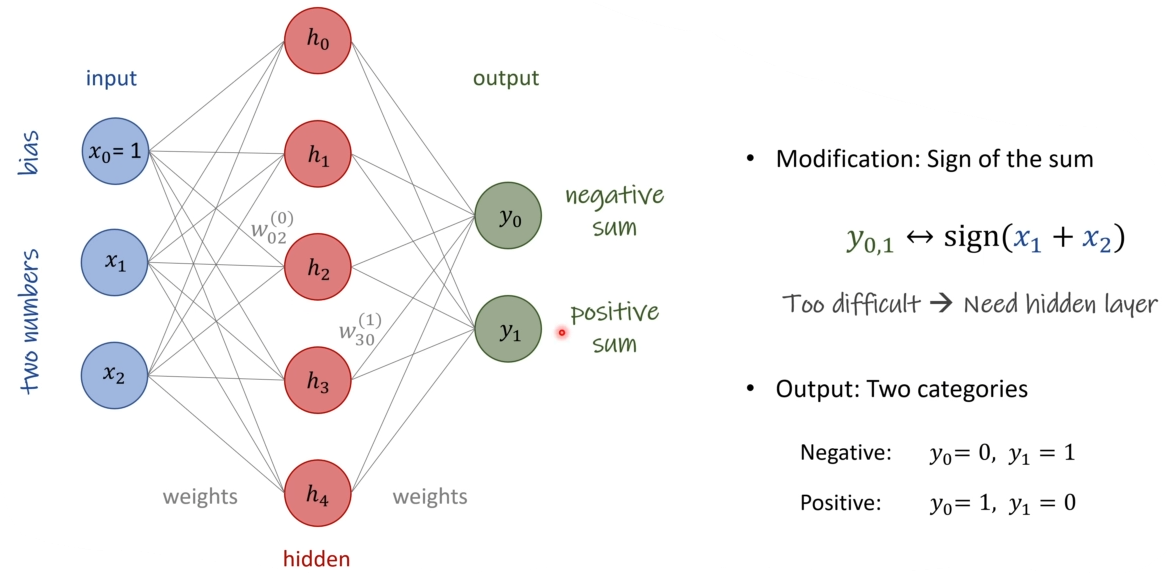

In [223]:
# As the output is in the range of 0 to 1, so we will also apply activation function here too....

In [224]:
# I am using the previously generated data x_train, y_train,x_test,y_test, but here we will use it to get the sign of the data.

In [225]:
# AS we need 2 outputs that will tell us that the sum of the two numbers is positive (0,1) or negative (1,0),
# y_train and y_test need to be converted into signs 
y_train = np.sign(y_train +0.1) # we are adding this 0.1 so that we can make the 0 as a positive number
y_test = np.sign(y_test+0.1)

In [226]:
y_train # +1 if the sum of the numbers is positive and -1 if it is negative 

array([ 1., -1.,  1., -1., -1., -1.,  1.,  1., -1.,  1., -1., -1., -1.,
       -1., -1.,  1., -1.,  1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,
       -1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1.,
       -1., -1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1., -1.,  1., -1.,  1., -1.,  1., -1., -1.,  1., -1.,  1.,  1.,
       -1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1., -1., -1., -1.,
        1.,  1.,  1., -1.,  1., -1., -1., -1., -1.,  1.,  1., -1.,  1.,
        1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1.,
       -1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1., -1., -1.,
       -1.,  1.,  1., -1.,  1., -1.,  1., -1., -1., -1., -1., -1.,  1.,
        1., -1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1., -1.,
        1.,  1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1., -1.,  1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,  1., -1.,
        1., -1.,  1., -1.,  1.,  1., -1., -1.,  1., -1.,  1., -1

In [227]:
# If we run  this outputs through our network, we will not get a good accuracy. and therefore we will introduce our hidden layer

In [228]:
# Also we need 2 outputs as sometimes we may get values that are exceeding 1, in the neural network, so that we can handle those

In [229]:
# Based of the output neurons that we have negative sum [y0] and positive sum [y1], we shall get an output for negative sign as 
# (y0,y1) ->(1,0) and vice versa for positive sum 

In [230]:
# right now we have to structure the output to get a vector like representation
y_train = np.transpose(np.array([(-y_train +1)/2,(y_train +1)/2]))
# if the value of y_train =-1 then the array will have the follwing output [(-(-1)+1)/2=1, -1+1/2 = 0]->[1,0]
y_test = np.transpose(np.array([(-y_test +1)/2,(y_test +1)/2]))

In [231]:
y_train[0]# positive number  

array([0., 1.])

In [232]:
x_train[0] # positive number

array([ 1., -2.,  7.])

In [233]:
# we have to defien new number of layers 
numLayers=[3,5,2]# inputlayers, hiddenlayers and output layers 

In [234]:
# defining correct structures for the weights 

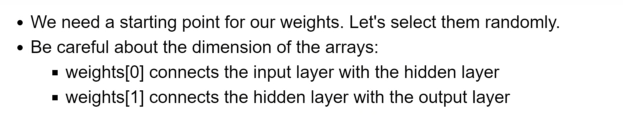

In [235]:
weights = [
 4 *np.random.random_sample([numLayers[0],numLayers[1]]) -2, # this corresponds to targets from input layer to hidden layer, it is going to have 15 values as 3*5 is 15
 4 *np.random.random_sample([numLayers[1],numLayers[2]]) -2,] # this corresponds from hiden kayer to output layer, it will have 6 values
# -2 is just for range of the numbers obtain that is from -2 to 2.

In [236]:
weights

[array([[ 0.41280571,  1.4336852 , -0.81322718, -1.75250588,  0.54951308],
        [ 1.53521072, -1.6742291 ,  0.06138903, -0.22169155, -0.53351438],
        [ 0.58074672, -0.58024483,  0.97110843, -1.73712165, -0.3364898 ]]),
 array([[-0.17577571,  1.45923232],
        [-1.19990863,  0.2887345 ],
        [-0.13160355,  0.06106619],
        [-0.99620796,  0.10605813],
        [-1.95577091,  0.55646073]])]

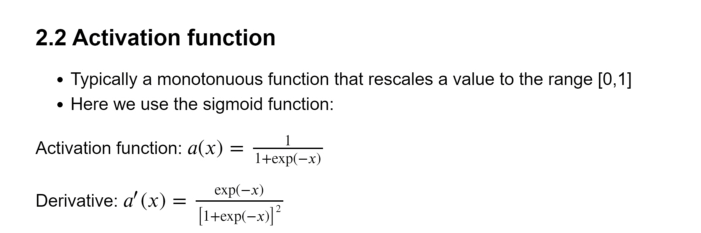

In [237]:
# It will restrict the output based on this range 
from scipy.special import expit

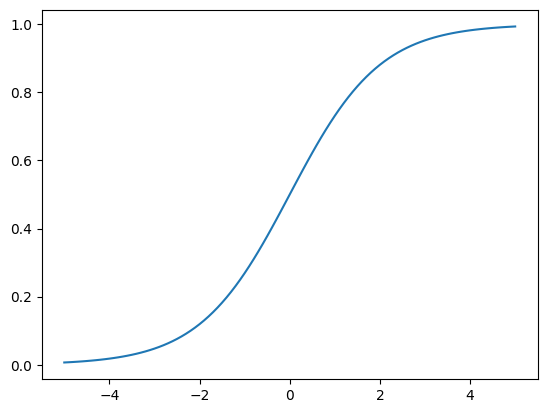

In [238]:
def activation(x):
    return expit(x) 
# it will make any input in bwteeen 0 and 1 
def activtaionDerivative(x):
    s=activation(x)
    return s*(1-s) 



x = np.linspace(-5,5,101) # 101 number between -5 and 5 
y1=activation(x)
plt.plot(x,y1, label = 'Actiavtion Function')

In [239]:
def calculateNext(x,w):
    return activation(np.dot(x,w)) # Here the activation will scale the output to a range of 0 to 1.

In [240]:
# Here we have to remeber that we need to embed our Hidden layer here as well 
calculateNext(calculateNext(x_train[10],weights[0]),weights[1])
# we are here just first calculating the input signal and then the hidden layer signal 

array([0.01560369, 0.7209512 ])

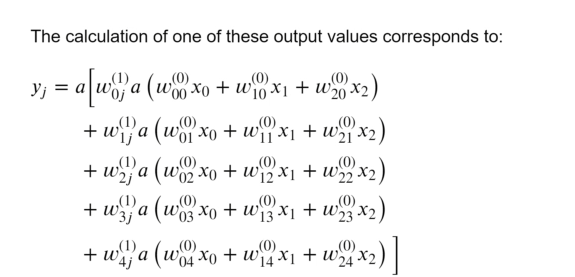

In [241]:
# Accuracy function based on the new outputs

In [242]:
np.array([0.8,0.3]).argmax() # will return us the index that has the biggest values 

0

In [243]:
np.array([[0.5,0.1],[0.4,0.7]]).argmax(axis=1) 
# In here it tells us the index based of the 1st array, in which we get the 0 for [0.5,0.1] and 1 for 0.4, 0.7

array([0, 1], dtype=int64)

In [244]:
def accuracyS(x_test, y_test,weights):
    return 1 - np.sum(np.abs(np.sign(np.abs(y_test.argmax(axis=1) - calculateNext(calculateNext(x_test,weights[0]),weights[1]).argmax(axis=1)))))/len(y_test)

In [245]:
# error function remains the same all we need to do is to supply neurons with hidden layer 

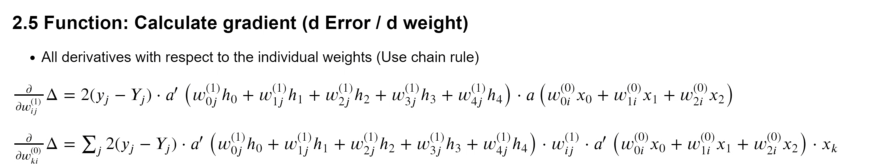

In [246]:
# it is pretty slow as it uses many loops 
# THis function is obtained by taking the derivative of our equation with respect to the weights....
def gradientS(x,w,correctvalues):
    dot = np.dot(x,w[0]) # dot product for weights with input variables  
    hiddenvalues= activation(dot) # coverting the function in a range of 0 to 1
    hiddenvaluesderivative = activtaionDerivative(dot)# refer to the above formulae for this 
    hiddenvaluesderivative2= activtaionDerivative(np.dot(hiddenvalues,w[1]))
    diff = calculateNext(hiddenvalues,w[1]) - correctvalues
    # gradient 
    grad0= np.array([[sum(
            diff *hiddenvaluesderivative2 *w[1][i,:] *hiddenvaluesderivative[i] *x[k]) 
                      for i in range(numLayers[1])]
                     for k in range(numLayers[0])])
    
    grad1 = np.array([
        2*diff*hiddenvaluesderivative2*hiddenvalues[i]
        for i in range(numLayers[1])])
    return [grad0,grad1]  
# This funxtion is just calculating the above formulae that we derived by 

In [247]:
gradientS(x_train[10],weights,y_train[10])

[array([[ 2.57710153e-06,  5.70353140e-08,  3.94712752e-06,
          3.03579204e-07,  4.16004604e-04],
        [-1.28855076e-05, -2.85176570e-07, -1.97356376e-05,
         -1.51789602e-06, -2.08002302e-03],
        [-1.80397107e-05, -3.99247198e-07, -2.76298926e-05,
         -2.12505443e-06, -2.91203223e-03]]),
 array([[-3.63662074e-07,  3.48836988e-06],
        [-3.02410569e-02,  2.90082468e-01],
        [-1.10084298e-05,  1.05596590e-04],
        [-3.02407841e-02,  2.90079851e-01],
        [-3.01265771e-02,  2.88984339e-01]])]

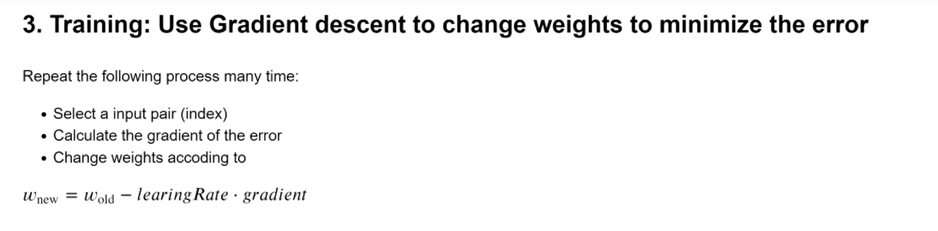

In [248]:
# Just have to make the same function repeated for a number of steps.....

In [249]:
learning_rate=0.001
steps=100000
errorlist= [error(calculateNext(calculateNext(x_train[10],weights[0]),weights[1]),y_train[10])]
###########################################################################################################

for i in range(steps):
    index = np.random.randint(1000-300) # picking any number between 0-700 as this is the test size of our data 
    grad = gradientS(x_train[index],weights,y_train[index])
    weights[0] = weights[0] - lr * grad[0]
    weights[1] = weights[1] - lr * grad[1]
    weightlist.append(weights)
    # calculate new errors
    errorlist.append(error(calculateNext(calculateNext(x_train[index],weights[0]),weights[1]),y_train[index]))   

In [250]:
errorlist

[0.06940332616497291,
 0.06706350520161637,
 0.05971100186863292,
 0.052352455901253474,
 0.058428116946819104,
 0.069381233761313,
 0.0001552340702935031,
 0.06960330945480542,
 0.06976600305726717,
 0.06978918098288668,
 0.05130073877589534,
 0.06387203407390832,
 0.008443716367582402,
 0.001900794219539924,
 0.07006209017563769,
 3.73453819798073e-05,
 0.059548979608903777,
 0.0031947104537095104,
 0.059500204658831435,
 0.05988598142432395,
 0.07014124847728018,
 0.003254246983619862,
 0.06923338004742437,
 0.04089501725874601,
 0.07016733290277118,
 0.06595963732420412,
 0.07037581581386412,
 0.06719070120807732,
 0.039387660512998454,
 0.05934692434860807,
 0.07057824977366237,
 0.04107282944875158,
 0.044274671615709756,
 0.05927183867297573,
 0.06803561028315658,
 0.055060098223506306,
 0.0028679346418032086,
 0.07088335235435224,
 0.00570607033694216,
 0.07010809902348104,
 0.03219477853429969,
 0.07088844903062473,
 0.07098201164165284,
 0.06531804495120774,
 0.07192068430353

In [251]:
print(errorlist[-1])

0.0014099230226632738


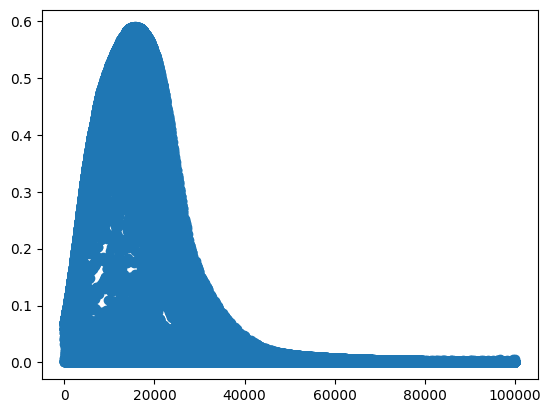

In [252]:
plt.scatter(range(steps +1 ),errorlist)


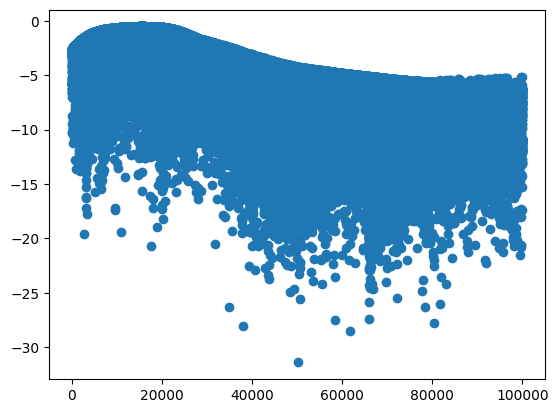

In [253]:
plt.scatter(range(steps +1 ),np.log(errorlist))# Suggest us that the error has decereased

In [254]:
weights

[array([[ 0.44971438,  1.42214158, -0.76864138, -1.74168406,  0.48293734],
        [ 1.3248034 , -1.43138659,  0.76299985, -0.61343247, -0.06192545],
        [ 1.3221165 , -1.0233352 ,  0.7761623 , -1.63272212,  0.64764344]]),
 array([[-1.89922336,  2.74749544],
        [ 1.71983703, -1.33473205],
        [-1.12675049,  0.83467095],
        [ 1.00727362, -1.32046417],
        [-0.36252185, -0.31247151]])]

In [255]:
y_test

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [256]:
np.round(calculateNext(calculateNext(x_test,weights[0]),weights[1])) 
# bigger the number on the site tells us that we are able to calculate the sign of the functions

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [257]:
accuracyS(x_test,y_test,weights) 
# getting 100% accuracy that means our neural network is able to approximate the sign problem. 

1.0

In [258]:
y_test.argmax(axis=1)

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1], d

# For Image Recognition

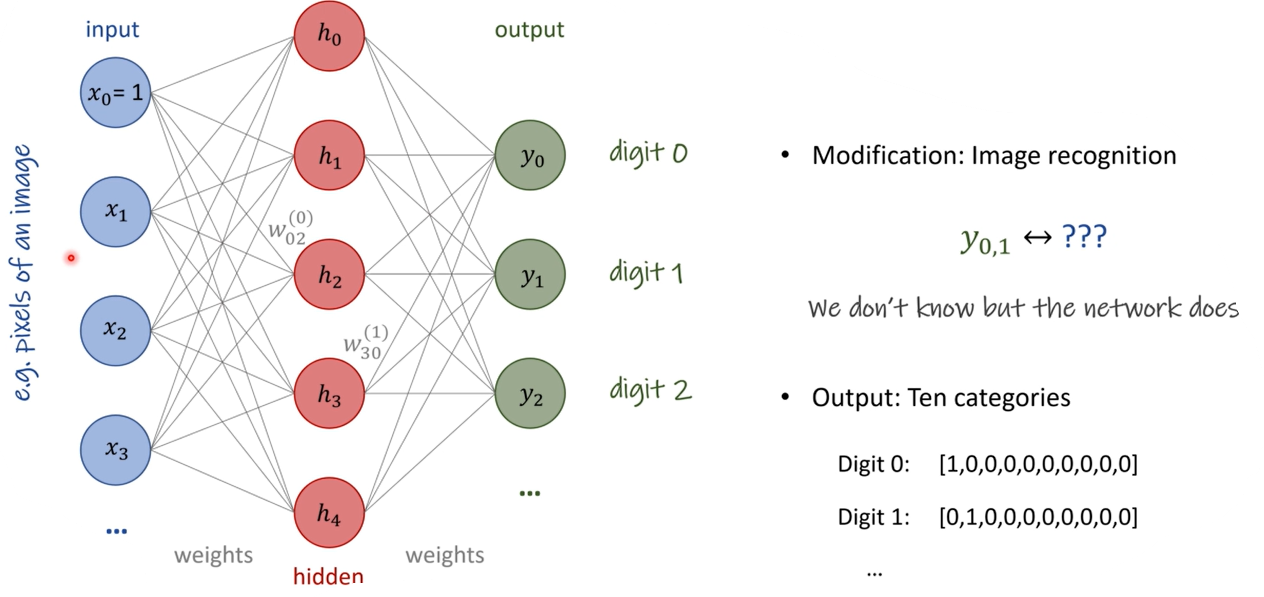

In [259]:
# preparing the test and train data 

In [260]:
from keras.datasets import mnist 

In [261]:
data=mnist.load_data()

In [262]:
(X_train, y_train), (X_test, y_test)=data 
# Training data has 60000 and test data has 10000 rows. 

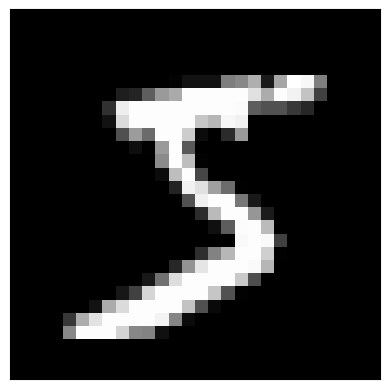

In [263]:
plt.xticks([])
plt.yticks([])
plt.imshow(X_train[0].reshape(28,28,1),cmap='gray') 
# we can see the images here, here 0 refers black pixels and 1 refers to white pixels

In [264]:
y_train[10]

3

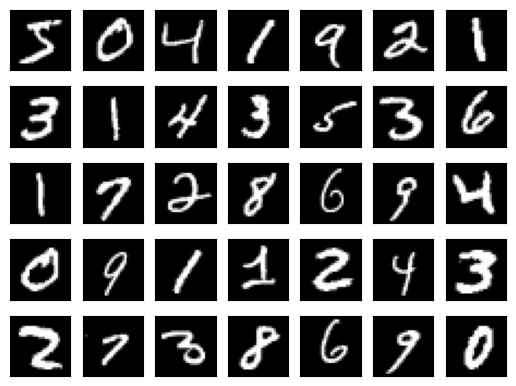

In [265]:
for i in range(35):
    plt.subplot(5, 7, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow( X_train[i].reshape(28,28, 1), cmap='gray' )
plt.show()

In [266]:
X_train=X_train.reshape(60000,28*28)
X_test =X_test.reshape(10000,28*28)

In [267]:
# adding biasness in the training data
trainingIn = np.append(np.full([60000, 1], 1), X_train, axis= 1)

In [268]:
trainingOut = np.append(np.full([10000, 1], 1), X_test, axis= 1)

In [269]:
y_train[0:10] # we can see that it matches with the above images but we need the output in someother format to demonstarte the 
# multiple output layers for example 5 must be presented as [0,0,0,0,0,1,0,0,0,0]# based on idexes 0,1,2,3,4,5,6,7,8,9

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [270]:
y_train =np.identity(10)[y_train]

In [271]:
y_test = np.identity(10)[y_test]

In [272]:
y_train[0] # we are successfully able to convert our data in the desired format 

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [273]:
hiddenLayer=[28*28+1,10,10]
# as there are 28*28+1 input parameyters and we need 10 hidden layers and alnogside this I need 10 output vectors, which will corresponds to every digit based on the above example

In [274]:
hiddenLayer

[785, 10, 10]

In [275]:
weights = [
    4 * np.random.random_sample([hiddenLayer[0],hiddenLayer[1]]) - 2,
    4 * np.random.random_sample([hiddenLayer[1],hiddenLayer[2]]) - 2
    ]
# keepin the weights in the same range of -2 to 2 

In [276]:
weights

[array([[-0.41757577,  0.82682963,  0.47932174, ...,  1.25013044,
          1.25111368,  1.2400833 ],
        [-0.28890692,  1.94978868, -0.83705073, ...,  1.14048935,
         -0.79790082,  1.73018916],
        [-1.65951068,  1.37011006, -1.31220345, ..., -1.60872909,
         -1.28956974, -1.77165048],
        ...,
        [ 1.73028131, -0.19398717, -0.76553733, ...,  0.0273369 ,
         -0.1077502 , -0.32116454],
        [-1.58188703, -0.50765216, -1.01920405, ...,  0.8380888 ,
          0.22328392, -0.50804881],
        [ 1.5663067 ,  0.83274146,  1.87720198, ...,  1.09543841,
         -1.15040634,  0.27147523]]),
 array([[ 1.27789851,  1.78301454, -0.12059936, -1.05204949,  0.6247984 ,
         -1.75913789,  0.69370285, -1.67158676,  0.98403812, -0.17051801],
        [ 0.33697691, -0.65984242,  1.21972376, -0.90306609,  0.28365281,
         -1.61763469,  0.25049676,  1.77367706,  0.48093592, -1.37133017],
        [ 1.7072876 ,  0.11818549,  1.52767069,  1.32310253, -1.99409065,
 

In [277]:
# activation and other function remain the same we are not changing then and will be using them from the above code 

In [278]:
# takin this data from teh abive functions
# Keeping the functionality of the calculation gradient same, we are able to speed up the process
def gradientMatrix(x,w,correctvalues):
    dot = np.dot(x,w[0]) # dot product for weights with input variables  
    hiddenvalues= activation(dot) # coverting the function in a range of 0 to 1
    hiddenvaluesderivative = activtaionDerivative(dot)# refer to the above formulae for this 
    hiddenvaluesderivative2= activtaionDerivative(np.dot(hiddenvalues,w[1]))
    diff = calculateNext(hiddenvalues,w[1]) - correctvalues
    grad1 = 2* np.matmul(np.transpose(np.array([hiddenvalues])),np.array([diff*hiddenvaluesderivative2]))
    grad0 = 2* np.sum(np.array([
        np.matmul(np.transpose(np.array([x])),np.array([diff[j]*hiddenvaluesderivative2[j]*w[1][:,j]*hiddenvaluesderivative ])) 
                  for j in range(hiddenLayer[2])]),axis=0) 
    return [grad0,grad1] 
    

In [279]:
calculateNext(calculateNext(trainingIn[10],weights[0]),weights[1])
# expit fuinction which is similar to signmoid is able to handle the warning errors 

array([0.97773631, 0.85563918, 0.08046327, 0.01348507, 0.48047125,
       0.29993034, 0.37723271, 0.78036197, 0.95773392, 0.47836497])

In [282]:
learning_rate=0.01
steps=100000
errorlist= [error(calculateNext(calculateNext(trainingIn[10],weights[0]),weights[1]),y_train[10])]
###########################################################################################################

for i in range(steps):
    index = np.random.randint(59999) # picking any number between 0-700 as this is the test size of our data 
    grad = gradientMatrix(trainingIn[index],weights,y_train[index])
    weights[0] = weights[0] - lr * grad[0]
    weights[1] = weights[1] - lr * grad[1]
    weightlist.append(weights)
    # calculate new errors
    errorlist.append(error(calculateNext(calculateNext(trainingIn[index],weights[0]),weights[1]),y_train[index]))  
    # We are getting overflow values as the weights maybe getting too small

In [283]:
accuracyS(trainingOut,y_test,weights) 
# My accuracy is still less probably because I need ti find the optimal values of the learning rate,But on computer each run takes a
# about 3-4 mins I am ignoring this as of now

0.2956

In [ ]:
# This marks the end of this neural network introduction.